### Join the gold prices together to have a consistent data set.
### I could do this in Excel but wanted to try and do it in Pandas.

### GOLD PRICES

### INCLUDES

In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [9]:
first_gold_price = pd.read_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/raw_data/daily_gold_rate.csv", index_col="Date")

In [10]:
first_gold_price.head()

USD     EUR     GBP      INR      AED    CNY
Date                                                       
1985-01-01  308.30  402.45  266.01  3825.85  1134.42    NaN
1985-01-02  305.50  401.49  266.00  3787.05  1134.42    NaN
1985-01-03  302.30  397.08  262.76  3718.88  1107.67    NaN
1985-01-04  303.15  397.15  262.58  3759.64  1118.21    NaN
1985-01-07  298.25  392.55  261.17  3741.23  1091.58  835.8

In [13]:
first_gold_price.tail()

USD      EUR      GBP        INR      AED       CNY
Date                                                               
2023-10-02  1833.05  1747.59  1513.92  152333.60  6732.79  13377.60
2023-10-03  1822.45  1741.97  1509.28  151684.52  6693.86  13300.24
2023-10-04  1818.95  1730.36  1496.83  151375.75  6680.82  13274.70
2023-10-05  1819.45  1726.89  1493.80  151431.00  6682.84  13278.35
2023-10-06  1819.60  1720.01  1487.33  151268.44  6683.39  13278.35

In [11]:
second_gold_price = pd.read_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/raw_data/XAU_1d_data gold to 2025.csv", sep=';', index_col='Date')

In [12]:
second_gold_price.head()

Open   High    Low  Close  Volume
Date                                                
2004.06.11 00:00  384.0  384.8  382.8  384.1     272
2004.06.14 00:00  384.3  385.8  381.8  382.8    1902
2004.06.15 00:00  382.8  388.8  381.1  388.6    1951
2004.06.16 00:00  387.1  389.8  382.6  383.8    2014
2004.06.17 00:00  383.6  389.3  383.0  387.6    1568

In [14]:
second_gold_price.tail()

Open     High      Low    Close  Volume
Date                                                        
2025.07.09 00:00  3301.97  3316.75  3282.64  3313.34  606759
2025.07.10 00:00  3313.26  3330.22  3310.02  3323.63  534692
2025.07.11 00:00  3323.57  3368.65  3321.75  3355.58  836228
2025.07.14 00:00  3364.09  3374.98  3340.95  3342.94  781945
2025.07.15 00:00  3343.04  3366.25  3320.17  3327.27  545183

In [17]:
second_gold_price.index.inferred_type

'string'

In [18]:
first_gold_price.index.inferred_type

'string'

In [20]:
first_gold_price.index = pd.to_datetime(first_gold_price.index)

In [22]:
second_gold_price.index = pd.to_datetime(second_gold_price.index)

In [21]:
first_gold_price.index.inferred_type

'datetime64'

In [23]:
second_gold_price.index.inferred_type

'datetime64'

In [24]:
first_gold_price.head()

USD     EUR     GBP      INR      AED    CNY
Date                                                       
1985-01-01  308.30  402.45  266.01  3825.85  1134.42    NaN
1985-01-02  305.50  401.49  266.00  3787.05  1134.42    NaN
1985-01-03  302.30  397.08  262.76  3718.88  1107.67    NaN
1985-01-04  303.15  397.15  262.58  3759.64  1118.21    NaN
1985-01-07  298.25  392.55  261.17  3741.23  1091.58  835.8

In [25]:
second_gold_price.head()

Open   High    Low  Close  Volume
Date                                          
2004-06-11  384.0  384.8  382.8  384.1     272
2004-06-14  384.3  385.8  381.8  382.8    1902
2004-06-15  382.8  388.8  381.1  388.6    1951
2004-06-16  387.1  389.8  382.6  383.8    2014
2004-06-17  383.6  389.3  383.0  387.6    1568

In [34]:
first_gold_price.query("Date < '2004-06-11'")['USD']

Date
1985-01-01    308.30
1985-01-02    305.50
1985-01-03    302.30
1985-01-04    303.15
1985-01-07    298.25
               ...  
2004-06-04    388.30
2004-06-07    393.60
2004-06-08    392.35
2004-06-09    386.85
2004-06-10    384.95
Name: USD, Length: 5073, dtype: float64

In [35]:
second_gold_price.query("Date >= '2004-06-11'")["Close"]

Date
2004-06-11     384.10
2004-06-14     382.80
2004-06-15     388.60
2004-06-16     383.80
2004-06-17     387.60
               ...   
2025-07-09    3313.34
2025-07-10    3323.63
2025-07-11    3355.58
2025-07-14    3342.94
2025-07-15    3327.27
Name: Close, Length: 5418, dtype: float64

In [37]:
gold_price_data = pd.concat([first_gold_price.query("Date < '2004-06-11'")['USD'], second_gold_price.query("Date >= '2004-06-11'")["Close"]], axis=0)

In [38]:
gold_price_data.head()

Date
1985-01-01    308.30
1985-01-02    305.50
1985-01-03    302.30
1985-01-04    303.15
1985-01-07    298.25
dtype: float64

In [63]:
gold_price_data_df = pd.DataFrame(gold_price_data, columns=['closing_gold'])

In [64]:
gold_price_data_df.tail()

closing_gold
Date                    
2025-07-09       3313.34
2025-07-10       3323.63
2025-07-11       3355.58
2025-07-14       3342.94
2025-07-15       3327.27

In [50]:
gold_price_data_df.index.inferred_type

'datetime64'

In [62]:
gold_price_data_df.to_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/hostorical_gold_price_1985-01-07_2025_07_15.csv")

In [58]:
inflation_first = pd.read_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/raw_data/ECB Data Portal_20250823144009 inflation.csv", index_col='DATE')

In [59]:
inflation_first.head()

TIME PERIOD  HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
DATE                                                                  
1997-01-31     1997Jan                                             2.0
1997-02-28     1997Feb                                             1.8
1997-03-31     1997Mar                                             1.6
1997-04-30     1997Apr                                             1.3
1997-05-31     1997May                                             1.4

In [65]:
inflation_first.tail()

TIME PERIOD  HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
DATE                                                                  
2025-03-31     2025Mar                                             2.2
2025-04-30     2025Apr                                             2.2
2025-05-31     2025May                                             1.9
2025-06-30     2025Jun                                             2.0
2025-07-31     2025Jul                                             2.0

In [66]:
inflation_first.index.inferred_type

'string'

In [67]:
inflation_first.index = pd.to_datetime(inflation_first.index)

In [68]:
inflation_first.index.inferred_type

'datetime64'

In [72]:
yield_curve_raw = pd.read_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/raw_data/EUR_YieldCurves_ECB.csv")

In [73]:
yield_curve_raw.head()

KEY FREQ REF_AREA CURRENCY PROVIDER_FM  \
0  YC.B.U2.EUR.4F.G_N_C.SV_C_YM.BETA0    B       U2      EUR          4F   
1  YC.B.U2.EUR.4F.G_N_C.SV_C_YM.BETA0    B       U2      EUR          4F   
2  YC.B.U2.EUR.4F.G_N_C.SV_C_YM.BETA0    B       U2      EUR          4F   
3  YC.B.U2.EUR.4F.G_N_C.SV_C_YM.BETA0    B       U2      EUR          4F   
4  YC.B.U2.EUR.4F.G_N_C.SV_C_YM.BETA0    B       U2      EUR          4F   

  INSTRUMENT_FM PROVIDER_FM_ID DATA_TYPE_FM TIME_PERIOD  OBS_VALUE  ...  \
0         G_N_C        SV_C_YM        BETA0  2004-09-06   5.442098  ...   
1         G_N_C        SV_C_YM        BETA0  2004-09-07   5.440139  ...   
2         G_N_C        SV_C_YM        BETA0  2004-09-08   5.427176  ...   
3         G_N_C        SV_C_YM        BETA0  2004-09-09   5.395118  ...   
4         G_N_C        SV_C_YM        BETA0  2004-09-10   5.364145  ...   

  UNIT_INDEX_BASE                                        COMPILATION  \
0             NaN  Technical notes are available at the following...   
1             NaN  Technical notes are available at the following...   
2             NaN  Technical notes are available at the following...   
3             NaN  Technical notes are available at the following...   
4             NaN  Technical notes are available at the following...   

   COVERAGE  DECIMALS SOURCE_AGENCY  SOURCE_PUB  \
0       NaN         6           NaN         NaN   
1       NaN         6           NaN         NaN   
2       NaN         6           NaN         NaN   
3       NaN         6           NaN         NaN   
4       NaN         6           NaN         NaN   

                                               TITLE  \
0  Yield curve parameters, Beta 0 - Government bo...   
1  Yield curve parameters, Beta 0 - Government bo...   
2  Yield curve parameters, Beta 0 - Government bo...   
3  Yield curve parameters, Beta 0 - Government bo...   
4  Yield curve parameters, Beta 0 - Government bo...   

                                         TITLE_COMPL  UNIT  UNIT_MULT  
0  Euro area (changing composition) - Government ...  PCPA          0  
1  Euro area (changing composition) - Government ...  PCPA          0  
2  Euro area (changing composition) - Government ...  PCPA          0  
3  Euro area (changing composition) - Government ...  PCPA          0  
4  Euro area (changing composition) - Government ...  PCPA          0  

[5 rows x 40 columns]

In [ ]:
yield_curve_raw['DATA_TYPE_FM'].query().unique()

array(['BETA0', 'BETA1', 'BETA2', ..., 'SR_9Y9M', 'TAU1', 'TAU2'],
      shape=(1080,), dtype=object)

In [85]:
yield_curve_raw.columns

Index(['KEY', 'FREQ', 'REF_AREA', 'CURRENCY', 'PROVIDER_FM', 'INSTRUMENT_FM',
       'PROVIDER_FM_ID', 'DATA_TYPE_FM', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_STATUS', 'OBS_CONF', 'OBS_PRE_BREAK', 'OBS_COM', 'TIME_FORMAT',
       'BREAKS', 'COLLECTION', 'COMPILING_ORG', 'DISS_ORG', 'DOM_SER_IDS',
       'FM_CONTRACT_TIME', 'FM_COUPON_RATE', 'FM_IDENTIFIER', 'FM_LOT_SIZE',
       'FM_MATURITY', 'FM_OUTS_AMOUNT', 'FM_PUT_CALL', 'FM_STRIKE_PRICE',
       'PUBL_MU', 'PUBL_PUBLIC', 'UNIT_INDEX_BASE', 'COMPILATION', 'COVERAGE',
       'DECIMALS', 'SOURCE_AGENCY', 'SOURCE_PUB', 'TITLE', 'TITLE_COMPL',
       'UNIT', 'UNIT_MULT'],
      dtype='object')

In [95]:
yield_coeff_long = yield_curve_raw[['TIME_PERIOD','DATA_TYPE_FM','OBS_VALUE']][yield_curve_raw['DATA_TYPE_FM'].isin(['BETA0','BETA1','BETA2','BETA3','TAU1','TAU2'])]

In [96]:
yield_coeff_narrow = yield_coeff_long.pivot(index='TIME_PERIOD', columns='DATA_TYPE_FM',values='OBS_VALUE')

In [104]:
yield_coeff_narrow.index.sort_values()

DatetimeIndex(['2004-09-06', '2004-09-07', '2004-09-08', '2004-09-09',
               '2004-09-10', '2004-09-13', '2004-09-14', '2004-09-15',
               '2004-09-16', '2004-09-17',
               ...
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='TIME_PERIOD', length=5195, freq=None)

In [98]:
yield_coeff_narrow.index.inferred_type

'string'

In [99]:
yield_coeff_narrow.index = pd.to_datetime(yield_coeff_narrow.index)

In [100]:
yield_coeff_narrow.index.inferred_type

'datetime64'

In [105]:
yield_coeff_narrow.to_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/yield_coefficients_2004-09-06_2024-12-30.csv")

In [109]:
yield_curve_long = yield_curve_raw[['TIME_PERIOD','DATA_TYPE_FM','OBS_VALUE']][yield_curve_raw['DATA_TYPE_FM'].str.contains('SR_')]

In [110]:
yield_curve_long

TIME_PERIOD DATA_TYPE_FM  OBS_VALUE
3740400  2004-09-06       SR_10M   2.233389
3740401  2004-09-07       SR_10M   2.257992
3740402  2004-09-08       SR_10M   2.273868
3740403  2004-09-09       SR_10M   2.242928
3740404  2004-09-10       SR_10M   2.212459
...             ...          ...        ...
5600205  2024-12-20      SR_9Y9M   2.915922
5600206  2024-12-23      SR_9Y9M   2.948088
5600207  2024-12-24      SR_9Y9M   2.949257
5600208  2024-12-27      SR_9Y9M   2.967126
5600209  2024-12-30      SR_9Y9M   2.983228

[1859810 rows x 3 columns]

In [216]:
def days(row):
    #strip off SR_
    string_to_manipulate = row
    #print(string_to_manipulate)
    location = string_to_manipulate.find('_')
    string_to_manipulate = string_to_manipulate[location+1:]
    #print(string_to_manipulate)
    if string_to_manipulate.find("Y") != -1:
        years = string_to_manipulate[:string_to_manipulate.find("Y")]
        #print(years)
        days = int(years) * 360
        #print(days)
        string_to_manipulate = string_to_manipulate[string_to_manipulate.find("Y")+1:]
        #print(string_to_manipulate)
    elif string_to_manipulate.find("M") != -1:
        months = string_to_manipulate[:string_to_manipulate.find("M")]
        #print(months)
        days = int(months) * 30
        #print(days)
        string_to_manipulate = string_to_manipulate[string_to_manipulate.find("M")+1:]
    else:
        print("missed)",string_to_manipulate)
    if string_to_manipulate.find("M") != -1:
        months = string_to_manipulate[:string_to_manipulate.find("M")]
        #print(months)
        days += int(months) * 30
        #print(days)
    else:
        print("missed - year done",string_to_manipulate)


    #print(location)
    return days


In [207]:
value = days(yield_curve_long.iloc[500000])

AttributeError: 'Series' object has no attribute 'find'

In [208]:
value

6360

In [209]:
yield_curve_long.iloc[0]

TIME_PERIOD         2004-09-06
DATA_TYPE_FM            SR_10M
OBS_VALUE             2.233389
days_to_maturity           600
Name: 3740400, dtype: object

In [217]:
yield_curve_long['days_to_maturity'] = yield_coeff_long['DATA_TYPE_FM'].apply(days)

missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 
missed - year done 


In [218]:
yield_curve_long['days_to_maturity'].value_counts()

days_to_maturity
300      5195
9840     5195
10770    5195
10740    5195
10440    5195
         ... 
6990     5195
6960     5195
6930     5195
6900     5195
3510     5195
Name: count, Length: 358, dtype: int64

In [221]:
yield_curve_narrow = yield_curve_long.pivot(index='TIME_PERIOD', columns='days_to_maturity',values='OBS_VALUE')

In [222]:
yield_curve_narrow.head()

days_to_maturity     90        120       150       180       210       240    \
TIME_PERIOD                                                                    
2004-09-06        2.001665  2.035532  2.069156  2.102528  2.135643  2.168494   
2004-09-07        2.009089  2.046040  2.082518  2.118527  2.154074  2.189163   
2004-09-08        2.014613  2.053308  2.091434  2.129000  2.166018  2.202495   
2004-09-09        2.010833  2.045006  2.078841  2.112336  2.145493  2.178310   
2004-09-10        2.006281  2.036011  2.065670  2.095246  2.124725  2.154094   

days_to_maturity     270       300       330       360    ...     10530  \
TIME_PERIOD                                               ...             
2004-09-06        2.201078  2.233389  2.265424  2.297177  ...  5.046783   
2004-09-07        2.223801  2.257992  2.291743  2.325058  ...  5.038186   
2004-09-08        2.238442  2.273868  2.308781  2.343190  ...  5.038782   
2004-09-09        2.210789  2.242928  2.274730  2.306193  ...  4.998065   
2004-09-10        2.183342  2.212459  2.241434  2.270257  ...  4.969526   

days_to_maturity     10560     10590     10620     10650     10680     10710  \
TIME_PERIOD                                                                    
2004-09-06        5.047940  5.049090  5.050233  5.051370  5.052499  5.053622   
2004-09-07        5.039360  5.040526  5.041685  5.042838  5.043983  5.045122   
2004-09-08        5.039917  5.041046  5.042168  5.043284  5.044393  5.045495   
2004-09-09        4.999232  5.000393  5.001546  5.002692  5.003832  5.004965   
2004-09-10        4.970692  4.971851  4.973004  4.974149  4.975287  4.976419   

days_to_maturity     10740     10770     10800  
TIME_PERIOD                                     
2004-09-06        5.054738  5.055848  5.056951  
2004-09-07        5.046254  5.047380  5.048499  
2004-09-08        5.046591  5.047680  5.048763  
2004-09-09        5.006091  5.007210  5.008323  
2004-09-10        4.977544  4.978662  4.979773  

[5 rows x 358 columns]

In [223]:
yield_curve_narrow.index.inferred_type

'string'

In [224]:
yield_curve_narrow.index = pd.to_datetime(yield_curve_narrow.index)

In [225]:
yield_curve_narrow.index.inferred_type

'datetime64'

In [226]:
yield_curve_narrow.to_csv("/Users/shogun/code/LAMBCS/lewagon_project/data/yield_curve_2004-09-06_2024-12-30.csv")

In [227]:
import seaborn as sns


In [244]:
yield_curve_narrow.iloc[0,:]

days_to_maturity
90       2.001665
120      2.035532
150      2.069156
180      2.102528
210      2.135643
           ...   
10680    5.052499
10710    5.053622
10740    5.054738
10770    5.055848
10800    5.056951
Name: 2004-09-06 00:00:00, Length: 358, dtype: float64

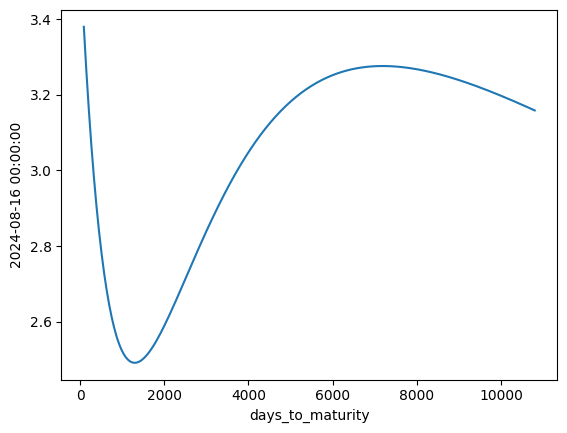

In [261]:
yield_curve = sns.lineplot(yield_curve_narrow.iloc[5100,:])

In [262]:
import matplotlib.pyplot as plt

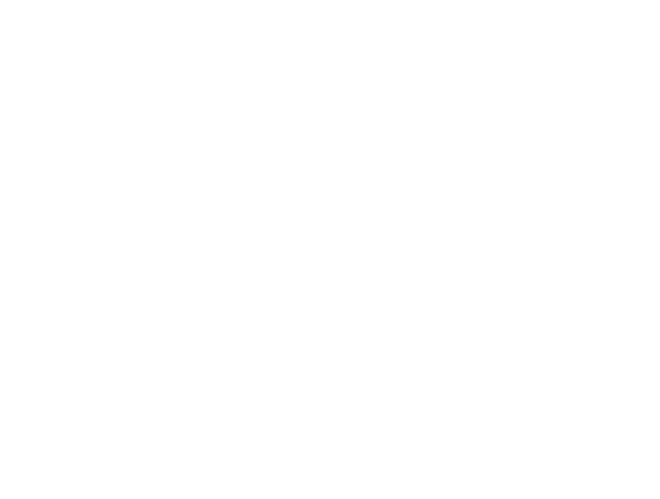

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0.,0.,1.,1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(yield_curve_narrow.iloc[5100,:])
plt.savefig("yield_curve.png")
plt.show()

In [264]:
from PIL import Image
image = Image.open("yield_curve.png")
image.show()